<a href="https://colab.research.google.com/github/alikhalefa30/Heart_Disease_Project/blob/main/Hear_Disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("heart.csv")

 Check for null values And processedv


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            data[column].fillna(data[column].median(), inplace=True)
        else:            data[column].fillna(data[column].mode()[0], inplace=True)


Missing values per column:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Draw box plots before handling outliers

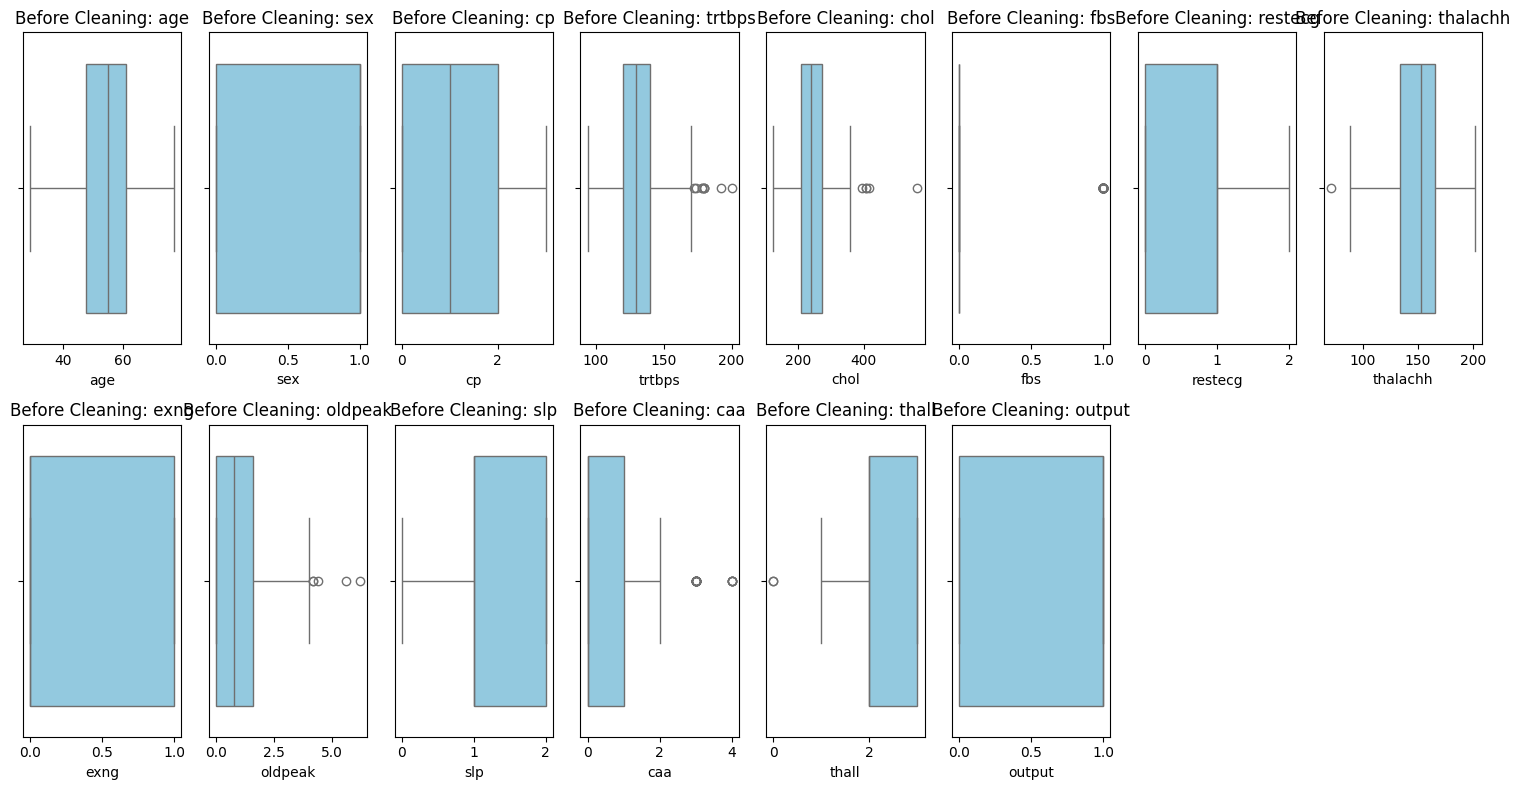

In [ ]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, len(data.select_dtypes(include=[np.number]).columns)//2 + 1, i)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Before Cleaning: {column}')
plt.tight_layout()
plt.show()


Handling outliers

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in data.select_dtypes(include=[np.number]).columns:
    data = remove_outliers_iqr(data, column)
data.describe()





,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [ ]:
cleaned_data = data.copy()


for column in cleaned_data.select_dtypes(include=[np.number]).columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)


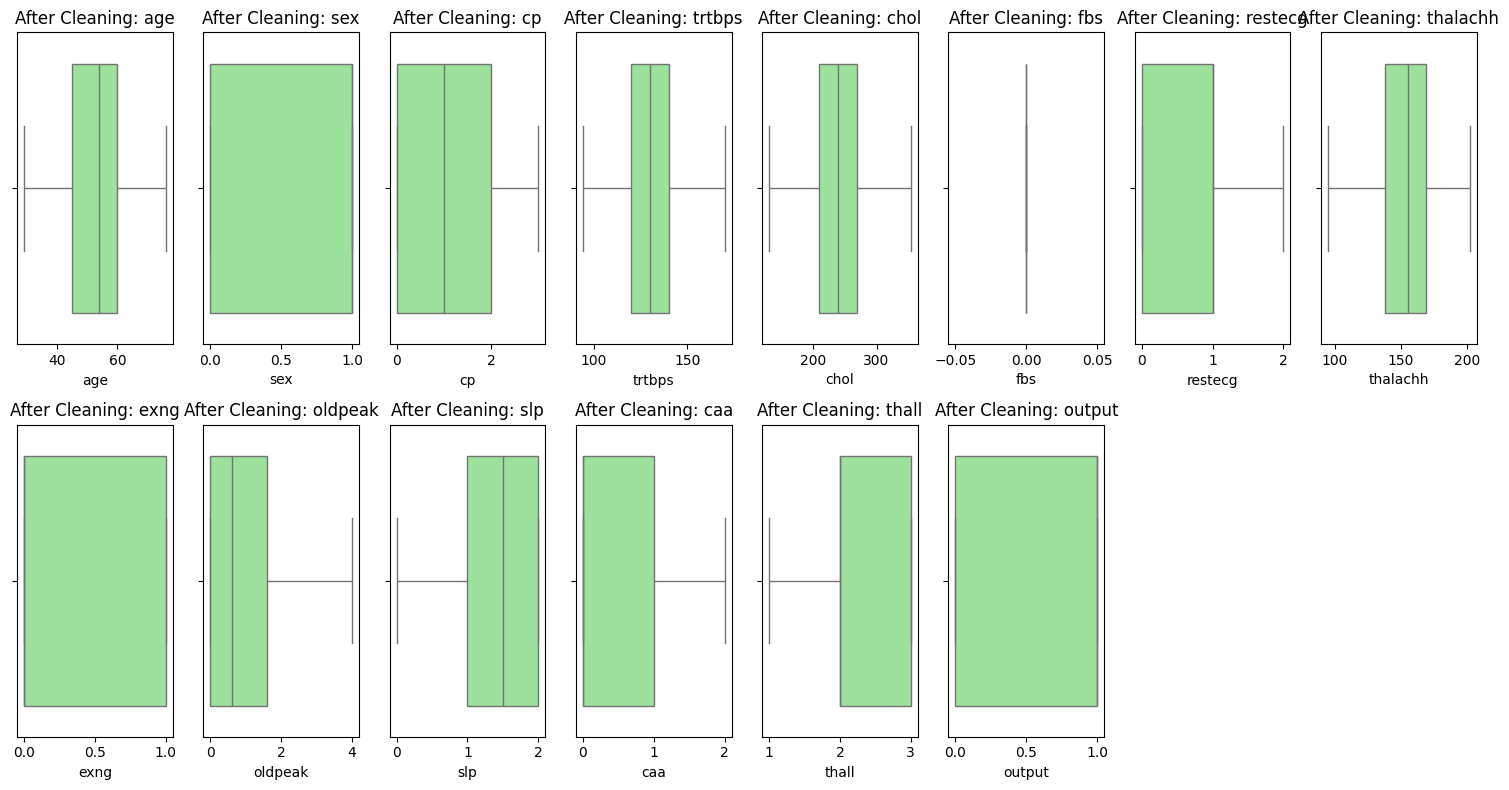

In [ ]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(cleaned_data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, len(cleaned_data.select_dtypes(include=[np.number]).columns)//2 + 1, i)
    sns.boxplot(x=cleaned_data[column], color='lightgreen')
    plt.title(f'After Cleaning: {column}')
plt.tight_layout()
plt.show()

#1. What is the age distribution among patients?

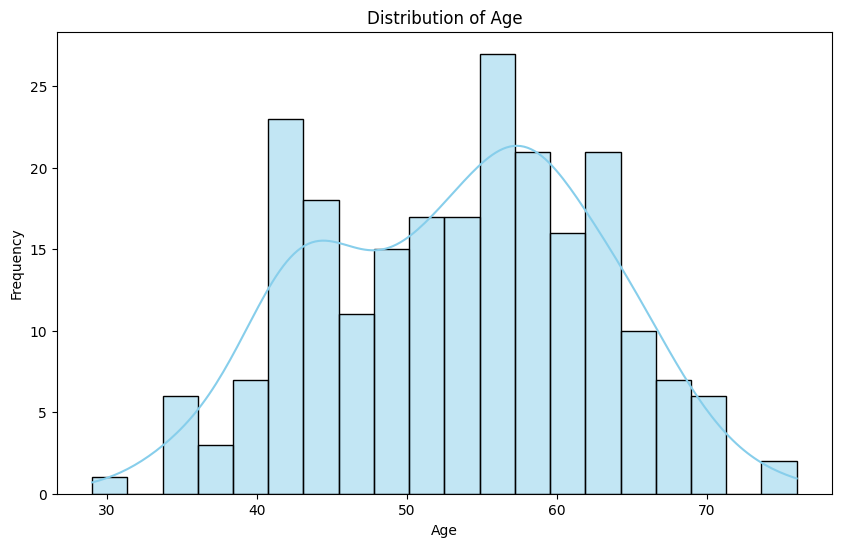

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color="skyblue", bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


 What is the ratio of males to females in the data set?

<ipython-input-18-31593ba0d471>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data, palette="viridis")


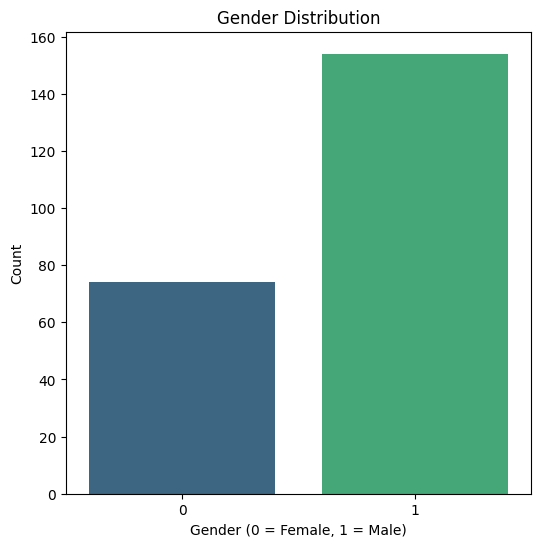

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=data, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


How are heart patients distributed by type of chest pain (cp)?

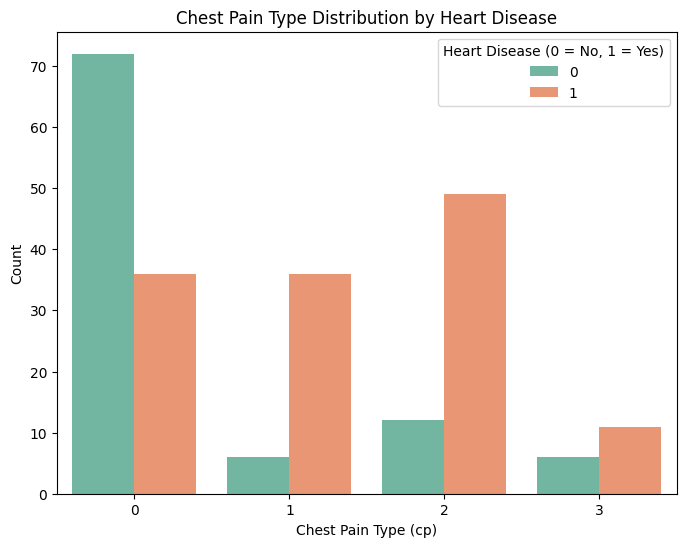

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='output', data=data, palette="Set2")
plt.title("Chest Pain Type Distribution by Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


What is the relationship between age and blood pressure (trtbps)?

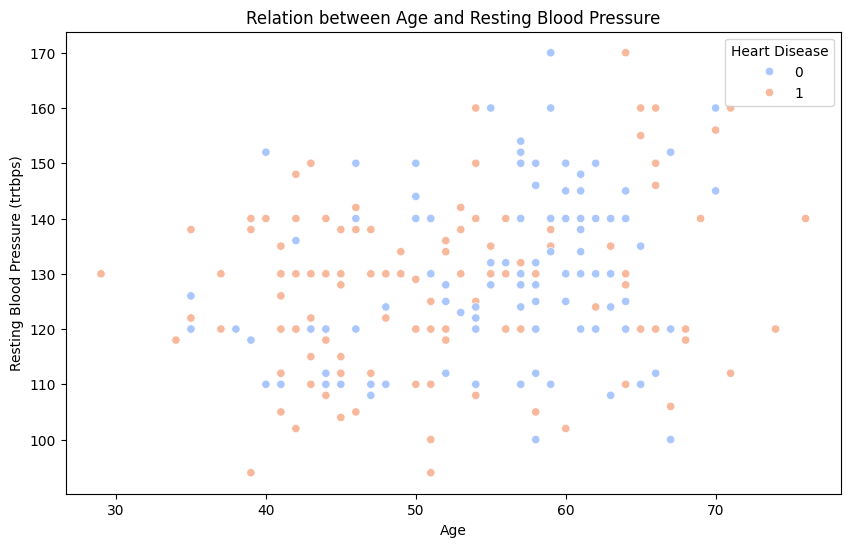

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trtbps', hue='output', data=data, palette="coolwarm")
plt.title("Relation between Age and Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (trtbps)")
plt.legend(title="Heart Disease")
plt.show()



 What is the distribution of cholesterol level (chol)?

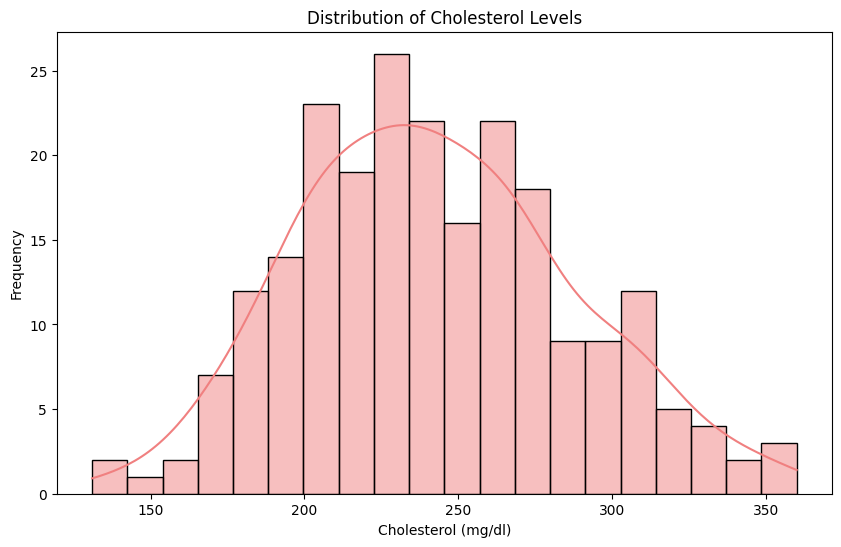

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['chol'], kde=True, color="lightcoral", bins=20)
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Frequency")
plt.show()


 What is the relationship between cholesterol and age?

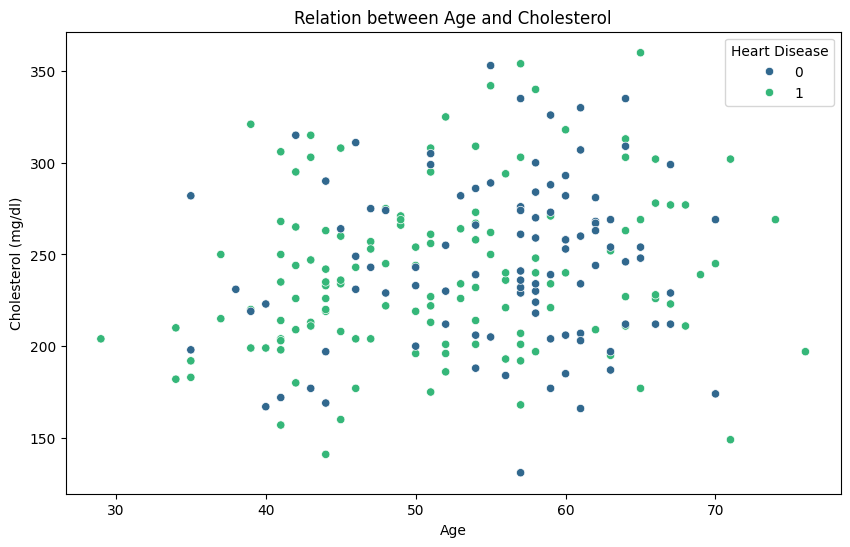

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='output', data=data, palette="viridis")
plt.title("Relation between Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dl)")
plt.legend(title="Heart Disease")
plt.show()


 What is the level of maximum heart rate (thalachh) in patients with heart disease versus others?

<ipython-input-23-4939cc400e98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='thalachh', data=data, palette="coolwarm")


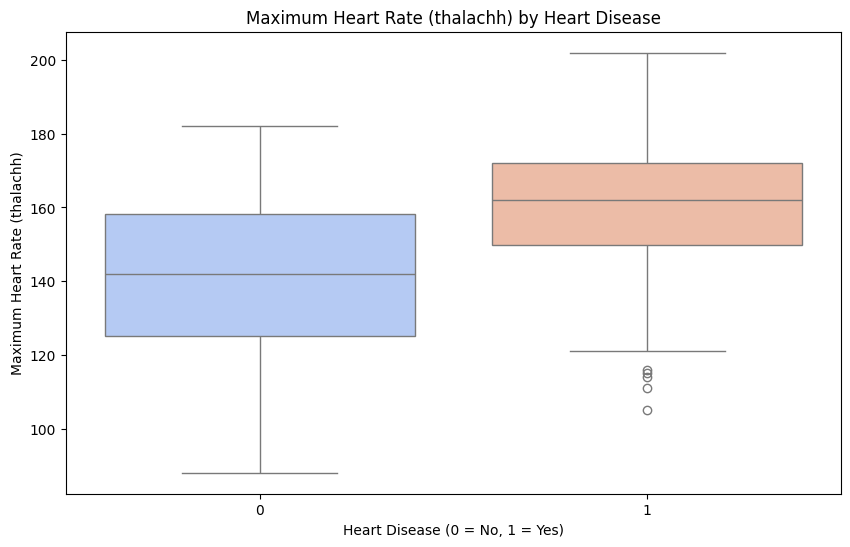

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='thalachh', data=data, palette="coolwarm")
plt.title("Maximum Heart Rate (thalachh) by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate (thalachh)")
plt.show()


 How is fasting blood glucose (FBS) distributed among patients?

<ipython-input-25-d33be47d3b2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fbs', data=data, palette="Set1")


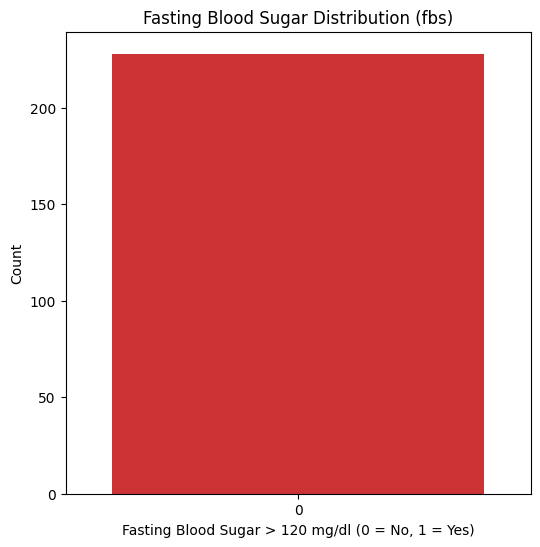

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='fbs', data=data, palette="Set1")
plt.title("Fasting Blood Sugar Distribution (fbs)")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


 How do the results of an electrocardiogram (restecg) affect the presence of heart disease?

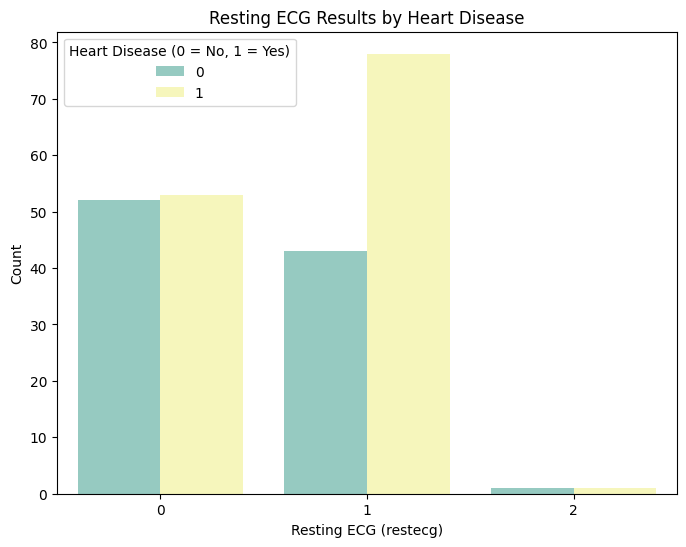

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='output', data=data, palette="Set3")
plt.title("Resting ECG Results by Heart Disease")
plt.xlabel("Resting ECG (restecg)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


 What is the relationship between ST depression during exercise (oldpeak) and the presence of heart disease?

<ipython-input-27-9c7660062a5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='output', y='oldpeak', data=data, palette="muted")


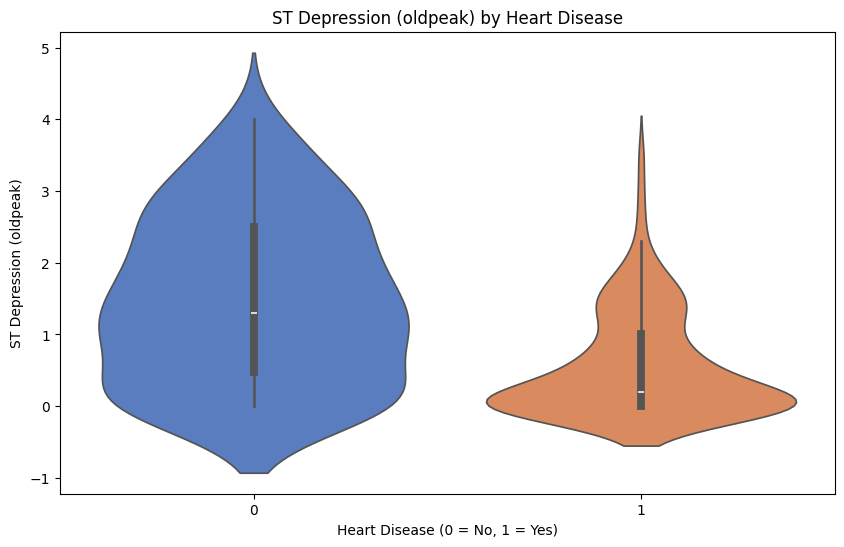

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='output', y='oldpeak', data=data, palette="muted")
plt.title("ST Depression (oldpeak) by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("ST Depression (oldpeak)")
plt.show()

